In [1]:
#The first step is loading our pickel files for dataset

In [2]:
import pickle
import numpy as np
import torch

infile = open("train.pkl",'rb')
dataset = pickle.load(infile)
infile.close()

In [3]:
for img_id in range(dataset.shape[0]):
    dataset[img_id] = (dataset[img_id] - torch.min(dataset[img_id])) / (torch.max(dataset[img_id]) - torch.min(dataset[img_id]))
noisy_dataset = dataset + (15 / 255) * np.random.randn(200*1600,40,40)

In [4]:
training_data = []
for i, img in enumerate(noisy_dataset):
    training_data.append((img[None,:,:], dataset[i,None,:,:]))

In [5]:
train_loader = torch.utils.data.DataLoader(training_data,batch_size=128,shuffle=True)

torch.Size([128, 1, 40, 40])


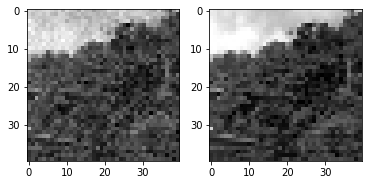

In [7]:
#Now that the dataset is prepared and shuffled, we can call the model function
import matplotlib.pyplot as plt
for noisy, clean in train_loader:
    print(noisy.shape)
    plt.subplot(1,2,1)
    plt.imshow(noisy[1,0], cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(clean[1,0], cmap='gray')
    break

In [10]:
import import_ipynb


In [11]:
import DnCNN_IVP

importing Jupyter notebook from DnCNN_IVP.ipynb


In [12]:
#Now that it is imported, let us define a device for GPU cuda
device=torch.device('cuda:0')

In [15]:
N=128
from torch import nn
class loss_new(nn.Module): #N is dataset size
  def __init__(self):
    super(loss_new,self).__init__()
  def forward(self,out,y,x):
    return torch.norm(out-(y-x))/(2*N) #Where does N get defined?

In [16]:
import torch
from torch import optim

In [17]:
criterion=loss_new()

In [18]:
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/apps/python/3.8.6/intel/bin/python -m pip install --upgrade pip' command.


In [19]:
#Need to set a batch size of 128
#Tensor to data loader
def training_function(net, loader, optim, model_name, epochs=50):
  from tqdm import tqdm
  loss_list=[]
  net.train()
  """
    y is the noisy image and it is used as input

    x is the noiseless image and it is used as a target label
  """
    
  for e in tqdm(range(epochs)): #For each epoch
    train_loss=0
    for i, (noisy, clean) in enumerate(loader):
      optim.zero_grad()#zero grad so they don't stack
      clean = clean.to(device, dtype=torch.float)
      noisy = noisy.to(device, dtype=torch.float)
      prediction = net(noisy)
      batch_loss = criterion(prediction, noisy, clean)
      batch_loss.backward()
      optim.step()
      scheduler.step()
      train_loss += batch_loss.item()

    train_loss = train_loss/len(loader)
    loss_list.append(train_loss)

    print ("Epoch {}: Has a loss of Loss: {:.6f}".format(e+1 ,train_loss))

  torch.save(model.state_dict(), model_name + '_D20.pt')
  return loss_list

In [ ]:
from torch.optim.lr_scheduler import StepLR
model=DnCNN_IVP.DnCNN(1,1,20)
device=torch.device('cuda:0')
model.to(device)
epoch = 50

optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0001)
scheduler = StepLR(optimizer, step_size=1, gamma=0.001**(1/50))
print('beginning with training 15')

plot_me_15_D20=training_function(model, train_loader, optimizer, 'dncnn_noise_15', 50)

beginning with training 15


  2%|▏         | 1/50 [03:25<2:47:56, 205.64s/it]

Epoch 1: Has a loss of Loss: 0.175142


  4%|▍         | 2/50 [06:51<2:44:31, 205.66s/it]

Epoch 2: Has a loss of Loss: 0.124257


  6%|▌         | 3/50 [10:17<2:41:07, 205.69s/it]

Epoch 3: Has a loss of Loss: 0.124132


  8%|▊         | 4/50 [13:42<2:37:44, 205.75s/it]

Epoch 4: Has a loss of Loss: 0.124134


 10%|█         | 5/50 [17:08<2:34:20, 205.78s/it]

Epoch 5: Has a loss of Loss: 0.124025


 12%|█▏        | 6/50 [20:34<2:30:53, 205.76s/it]

Epoch 6: Has a loss of Loss: 0.124069


 14%|█▍        | 7/50 [24:00<2:27:27, 205.76s/it]

Epoch 7: Has a loss of Loss: 0.124149


 16%|█▌        | 8/50 [27:25<2:24:01, 205.75s/it]

Epoch 8: Has a loss of Loss: 0.124106


 18%|█▊        | 9/50 [30:51<2:20:36, 205.76s/it]

Epoch 9: Has a loss of Loss: 0.124073


 20%|██        | 10/50 [34:17<2:17:09, 205.75s/it]

Epoch 10: Has a loss of Loss: 0.124438


 22%|██▏       | 11/50 [37:43<2:13:43, 205.74s/it]

Epoch 11: Has a loss of Loss: 0.124188


 24%|██▍       | 12/50 [41:08<2:10:17, 205.73s/it]

Epoch 12: Has a loss of Loss: 0.124102


 26%|██▌       | 13/50 [44:34<2:06:51, 205.71s/it]

Epoch 13: Has a loss of Loss: 0.124211


 28%|██▊       | 14/50 [48:00<2:03:25, 205.72s/it]

Epoch 14: Has a loss of Loss: 0.124151


 30%|███       | 15/50 [51:25<2:00:00, 205.72s/it]

Epoch 15: Has a loss of Loss: 0.124189


 32%|███▏      | 16/50 [54:51<1:56:35, 205.74s/it]

Epoch 16: Has a loss of Loss: 0.124148


 34%|███▍      | 17/50 [58:17<1:53:09, 205.74s/it]

Epoch 17: Has a loss of Loss: 0.124414


 36%|███▌      | 18/50 [1:01:43<1:49:44, 205.77s/it]

Epoch 18: Has a loss of Loss: 0.124196


 38%|███▊      | 19/50 [1:05:09<1:46:18, 205.76s/it]

Epoch 19: Has a loss of Loss: 0.124275


 40%|████      | 20/50 [1:08:34<1:42:52, 205.76s/it]

Epoch 20: Has a loss of Loss: 0.124280


 42%|████▏     | 21/50 [1:12:00<1:39:27, 205.76s/it]

Epoch 21: Has a loss of Loss: 0.124145


 44%|████▍     | 22/50 [1:15:26<1:36:01, 205.76s/it]

Epoch 22: Has a loss of Loss: 0.124158


 46%|████▌     | 23/50 [1:18:52<1:32:35, 205.76s/it]

Epoch 23: Has a loss of Loss: 0.124173


 48%|████▊     | 24/50 [1:22:17<1:29:09, 205.76s/it]

Epoch 24: Has a loss of Loss: 0.124234


 50%|█████     | 25/50 [1:25:43<1:25:43, 205.76s/it]

Epoch 25: Has a loss of Loss: 0.124313


 52%|█████▏    | 26/50 [1:29:09<1:22:18, 205.75s/it]

Epoch 26: Has a loss of Loss: 0.124195


 54%|█████▍    | 27/50 [1:32:35<1:18:52, 205.75s/it]

Epoch 27: Has a loss of Loss: 0.124150


 56%|█████▌    | 28/50 [1:36:00<1:15:26, 205.74s/it]

Epoch 28: Has a loss of Loss: 0.124165


 58%|█████▊    | 29/50 [1:39:26<1:12:00, 205.74s/it]

Epoch 29: Has a loss of Loss: 0.124217


 60%|██████    | 30/50 [1:42:52<1:08:34, 205.72s/it]

Epoch 30: Has a loss of Loss: 0.124342


 62%|██████▏   | 31/50 [1:46:17<1:05:08, 205.71s/it]

Epoch 31: Has a loss of Loss: 0.124331


 64%|██████▍   | 32/50 [1:49:43<1:01:42, 205.71s/it]

Epoch 32: Has a loss of Loss: 0.124101


 66%|██████▌   | 33/50 [1:53:09<58:17, 205.73s/it]  

Epoch 33: Has a loss of Loss: 0.124247


 68%|██████▊   | 34/50 [1:56:35<54:51, 205.74s/it]

Epoch 34: Has a loss of Loss: 0.124285


 70%|███████   | 35/50 [2:00:00<51:26, 205.75s/it]

Epoch 35: Has a loss of Loss: 0.124134


 72%|███████▏  | 36/50 [2:03:26<48:00, 205.75s/it]

Epoch 36: Has a loss of Loss: 0.124106


 74%|███████▍  | 37/50 [2:06:52<44:34, 205.75s/it]

Epoch 37: Has a loss of Loss: 0.124254


 76%|███████▌  | 38/50 [2:10:18<41:09, 205.76s/it]

Epoch 38: Has a loss of Loss: 0.124320


 78%|███████▊  | 39/50 [2:13:43<37:43, 205.76s/it]

Epoch 39: Has a loss of Loss: 0.124232


 80%|████████  | 40/50 [2:17:09<34:17, 205.76s/it]

Epoch 40: Has a loss of Loss: 0.124210


 82%|████████▏ | 41/50 [2:20:35<30:51, 205.75s/it]

Epoch 41: Has a loss of Loss: 0.124092


 84%|████████▍ | 42/50 [2:24:01<27:26, 205.77s/it]

Epoch 42: Has a loss of Loss: 0.124185


 86%|████████▌ | 43/50 [2:27:27<24:00, 205.76s/it]

Epoch 43: Has a loss of Loss: 0.124220


In [ ]:
with open('training_loss_noise_15_D20.txt', 'w') as f:
    f.writelines([str(loss) + '\n' for loss in plot_me_15_D20])